In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1.패키지 로드 및 데이터 로드

In [2]:
import numpy as np
import pandas as pd

from collections import Counter
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten

import matplotlib.pyplot as plt

In [3]:
!pip install konlpy
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git 
%cd Mecab-ko-for-Google-Colab/
!bash install_mecab-ko_on_colab190912.sh
%cd ../

     |████████████████████████████████| 19.4 MB 1.4 MB/s 
     |████████████████████████████████| 448 kB 30.7 MB/s 
Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 109, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 109 (delta 7), reused 10 (delta 3), pack-reused 91
Receiving objects: 100% (109/109), 1.27 MiB | 6.22 MiB/s, done.
Resolving deltas: 100% (46/46), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2022-04-20 05:37:12--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22c0:3470, 2406:da00:ff00::22c5:2ef4, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Loca

In [4]:
total_data = pd.read_csv('/content/drive/MyDrive/YGL/Final_Project/Final_Project_Sharing/민경태/DATA/info_0.1_219573_1650432486.317489.csv', index_col= 0)
print('전체 데이터 갯수 :', len(total_data))

전체 데이터 갯수 : 219573


In [5]:
total_data

,data,key
0,1소나기 언제와?5_,날씨
1,4눈와?~,날씨
2,9강수량 알려줘%6,날씨
3,")오전 풍속 어때?,]",날씨
4,.풍속 얼마나 돼?자외선 지수 알려줘_;,날씨
...,...,...
219568,남친이랑 여기 매화근처 얼마나 걸려?,시간
219569,남사친과 이쪽에 커플스냅관련된 곳 가서 얼마나 걸릴까?,시간
219570,친구들이랑글램핑언제 브레이크타임이야?브레이크타임 언제야?,시간
219571,여자 친구와 가까운 산책언제 가게 열어?,시간


# 2.데이터전처리

## 훈련데이터와 테스트데이터를 분리

In [6]:
# total_data['label'] = np.select([total_data.ratings > 3], [1], default=0)

In [7]:
total_data['key'].unique(), total_data['key'].nunique()

(array(['날씨', '위치', '시간'], dtype=object), 3)

In [8]:
total_data['key'].nunique()

3

In [9]:
total_data.drop_duplicates(subset='data', inplace=True)

In [10]:
total_data.reset_index(drop=True, inplace=True)

In [11]:
total_data.isnull().sum()

data    0
key     0
dtype: int64

In [12]:
total_data

,data,key
0,1소나기 언제와?5_,날씨
1,4눈와?~,날씨
2,9강수량 알려줘%6,날씨
3,")오전 풍속 어때?,]",날씨
4,.풍속 얼마나 돼?자외선 지수 알려줘_;,날씨
...,...,...
219568,남친이랑 여기 매화근처 얼마나 걸려?,시간
219569,남사친과 이쪽에 커플스냅관련된 곳 가서 얼마나 걸릴까?,시간
219570,친구들이랑글램핑언제 브레이크타임이야?브레이크타임 언제야?,시간
219571,여자 친구와 가까운 산책언제 가게 열어?,시간


In [13]:
train_data, test_data = train_test_split(total_data, test_size=0.25, random_state=42, stratify=total_data['key'])
print('훈련용 데이터의 갯수 :', len(train_data))
print('테스트용 데이터의 갯수 :', len(test_data))

훈련용 데이터의 갯수 : 164679
테스트용 데이터의 갯수 : 54894


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50472 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_

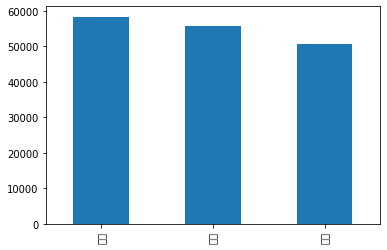

In [14]:
train_data['key'].value_counts().plot(kind='bar') 

In [15]:
print(train_data.groupby('key').size().reset_index(name='count'))

  key  count
0  날씨  58367
1  시간  50625
2  위치  55687


## 데이터 정제 2

In [16]:
train_data['data'].replace('', np.nan, inplace=True)

In [17]:
print(train_data.isnull().sum())

data    0
key     0
dtype: int64


## Test data 정제

In [18]:
#1. 중복 제거
test_data.drop_duplicates(subset='data', inplace=True)

#2. 정규표현식을 이용하여 한글 외 문자 제거
# test_data['data'] = test_data['data'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "")

#3. 공백을 null 변경
test_data['data'].replace('', np.nan, inplace = True)

#4. Null값 제거
test_data['data'].dropna(how='any')

#5. 테스트 갯수 반환
print('테스트용 리뷰의 갯수 :', len(test_data))

테스트용 리뷰의 갯수 : 54894


## 불용어 제거

In [19]:
stopwords = ['의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', '으로', '자', '에', '와', '한', '하다']

In [20]:
# from konlpy.tag import Okt
from konlpy.tag import Mecab
# from konlpy.tag import Komoran

In [21]:
mecab = Mecab()
# okt = Okt()
# komoran = Komoran()

In [22]:
train_data['tokenized'] = train_data['data'].apply(mecab.morphs) # 형태소 분석완료
train_data['tokenized'] = train_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

test_data['tokenized'] = test_data['data'].apply(mecab.morphs) # 형태소 분석완료
test_data['tokenized'] = test_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [23]:
train_data.head()

,data,key,tokenized
10184,2오전에 비와?2,날씨,"[2, 오전, 비와, ?, 2]"
87661,부모님이랑 여기 겨울관련된 곳 가서 전화 번호 알려줘,위치,"[부모, 님, 이랑, 여기, 겨울, 관련, 된, 곳, 서, 전화, 번호, 알려줘]"
20717,강수량 알려줘6!,날씨,"[강수량, 알려줘, 6, !]"
17980,5바람 많이 와?&,날씨,"[5, 바람, 많이, ?, &]"
209658,가족들이랑 가까운 동굴일몰 언제야?,시간,"[가족, 이랑, 가까운, 동굴, 일몰, 언제, 야, ?]"


In [24]:
test_data.head()

,data,key,tokenized
184931,나 혼자서여기 너븐숭이근처 언제 가게 닫혀?,시간,"[나, 혼자, 서, 여기, 너, 븐, 숭, 근처, 언제, 가게, 닫, 혀, ?]"
113059,둘이서 나 수영장근처 어디야,위치,"[둘, 서, 나, 수영장, 근처, 어디, 야]"
212762,가족들이랑 여기 오름근처 언제 가게 닫혀?,시간,"[가족, 이랑, 여기, 오름, 근처, 언제, 가게, 닫, 혀, ?]"
106874,애들이랑 숲관련된 곳 가서 어디로 가야해,위치,"[애, 이랑, 숲, 관련, 된, 곳, 서, 어디, 로, 야, 해]"
75623,@습도 알려줘 _,날씨,"[@, 습도, 알려줘, _]"


## 단어와 길이 분포 확인

In [25]:
x_train = train_data['tokenized'].values
y_train = train_data['key'].values
x_test = test_data['tokenized'].values
y_test = test_data['key'].values

In [26]:
print(x_train)
print(y_train)
print(x_test)
print(y_test)

[list(['2', '오전', '비와', '?', '2'])
 list(['부모', '님', '이랑', '여기', '겨울', '관련', '된', '곳', '서', '전화', '번호', '알려줘'])
 list(['강수량', '알려줘', '6', '!']) ... list(['/', '비', '언제', '?', '+)'])
 list(['강우량', '어떻게', '돼', '?', '0', '_'])
 list(['여', '사친', '길', '연극', '근처', '어디', '있', '어', '?'])]
['날씨' '위치' '날씨' ... '날씨' '날씨' '위치']
[list(['나', '혼자', '서', '여기', '너', '븐', '숭', '근처', '언제', '가게', '닫', '혀', '?'])
 list(['둘', '서', '나', '수영장', '근처', '어디', '야'])
 list(['가족', '이랑', '여기', '오름', '근처', '언제', '가게', '닫', '혀', '?']) ...
 list(['혼자', '서', '여기', '액티비티', '근처', '어느', '위치', '있', '어', '?'])
 list(['이쪽', '자연', '경관', '근처', '어느', '쪽', '야', '돼', '?'])
 list(['6', '강수량', '알려줘', '*='])]
['시간' '위치' '시간' ... '위치' '위치' '날씨']


## 정수 인코딩

In [27]:
vocab_size = 10000
t = Tokenizer(vocab_size, oov_token='OOV')
t.fit_on_texts(x_train)

In [28]:
threshold = 2
total_cnt = len(t.word_index)
rare_cnt = 0
total_freq = 0
rare_freq = 0

for key, value in t.word_counts.items():
    total_freq = total_freq + value

    if (value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합 (vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀단어의 수 : %s' %(threshold-1, rare_cnt))
print('단어 집합에서 희귀단어의 비율 :', (rare_cnt/total_cnt)*100)
print('전체 등장 빈도에서 희귀단어 등장 빈도 비율 :', (rare_freq/total_freq)* 100)

단어 집합 (vocabulary)의 크기 : 786
등장 빈도가 1번 이하인 희귀단어의 수 : 6
단어 집합에서 희귀단어의 비율 : 0.7633587786259541
전체 등장 빈도에서 희귀단어 등장 빈도 비율 : 0.00042820531302878895


In [29]:
# 전체 단어 갯수 중 빈도수 2이하인 단어 갯수는 제거.
# 0번 패딩 토큰과 1번 OOV토큰을 고려하여 +2
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :', vocab_size)

단어 집합의 크기 : 782


In [30]:
original_vocab_size = vocab_size + rare_cnt -2
print('원래 vocab size :', original_vocab_size)

원래 vocab size : 786


In [31]:
x_train[0]

['2', '오전', '비와', '?', '2']

In [32]:
t = Tokenizer(vocab_size, oov_token='OOV')
t.fit_on_texts(x_train)

x_train = t.texts_to_sequences(x_train)
x_test = t.texts_to_sequences(x_test)

In [33]:
print(x_train[:3])
print(x_test[:3])

[[85, 59, 75, 2, 85], [39, 40, 7, 25, 197, 10, 8, 9, 4, 70, 65, 12], [54, 12, 88, 96]]
[[16, 20, 4, 25, 158, 159, 160, 5, 3, 71, 30, 31, 2], [89, 4, 16, 223, 5, 17, 6], [41, 7, 25, 201, 5, 3, 71, 30, 31, 2]]


## 패딩(Padding)

데이터의 최대 길이 : 22
데이터의 평균 길이 : 8.508656234249662


Text(0, 0.5, 'number of samples')

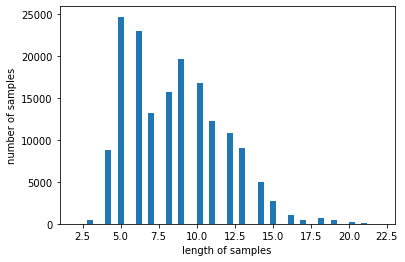

In [34]:
print('데이터의 최대 길이 :', max(len(l) for l in x_train))
print('데이터의 평균 길이 :', sum(map(len, x_train))/len(x_train))

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')

In [35]:
def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if (len(s) <= max_len):
            cnt = cnt + 1

    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율 : %s' % (max_len, (cnt/len(nested_list))*100))

In [36]:
max_len = 15
below_threshold_len(max_len, x_train)

전체 샘플 중 길이가 15 이하인 샘플의 비율 : 98.21227964707097


In [37]:
x_train = pad_sequences(x_train, maxlen = max_len)
x_test = pad_sequences(x_test, maxlen = max_len)

print(x_train.shape)
print(x_test.shape)

(164679, 15)
(54894, 15)


In [38]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [39]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 3.학습

## 모델 정의

In [40]:
from tensorflow.keras.layers import Embedding, Dense, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [41]:
embedding_dim = 100
hidden_size = 128

model_gru = Sequential()
model_gru.add(Embedding(vocab_size, 100))
model_gru.add(GRU(hidden_size, return_sequences = True))
model_gru.add(GRU(hidden_size))
model_gru.add(Dense(len(set(total_data['key'])), activation='softmax'))
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         78200     
                                                                 
 gru (GRU)                   (None, None, 128)         88320     
                                                                 
 gru_1 (GRU)                 (None, 128)               99072     
                                                                 
 dense (Dense)               (None, 3)                 387       
                                                                 
Total params: 265,979
Trainable params: 265,979
Non-trainable params: 0
_________________________________________________________________


In [42]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint('hyerim_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [43]:
type(x_train), type(x_train),

(numpy.ndarray, numpy.ndarray)

In [44]:
epoch = 5

model_gru.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['acc'])
history_gru = model_gru.fit(x_train, y_train, epochs=epoch, callbacks=[es, mc], batch_size=60)

Epoch 1/5
2745/2745 [==============================] - 44s 13ms/step - loss: 0.0071 - acc: 0.9967
Epoch 2/5
2745/2745 [==============================] - 37s 13ms/step - loss: 9.6174e-07 - acc: 1.0000
Epoch 3/5
2745/2745 [==============================] - 37s 14ms/step - loss: 2.3000e-07 - acc: 1.0000
Epoch 4/5
2745/2745 [==============================] - 37s 13ms/step - loss: 5.0779e-08 - acc: 1.0000
Epoch 5/5
2745/2745 [==============================] - 37s 13ms/step - loss: 7.0101e-09 - acc: 1.0000


In [45]:
model_gru.evaluate(x_test, y_test)[1] # [1]은 acc를 의미하고 acc를 저장한다는 의미

1716/1716 [==============================] - 11s 6ms/step - loss: 1.2495e-08 - acc: 1.0000


1.0

# 4.예측하기

In [46]:
def sentiment_predict(new_sentence):
    new_sentence = mecab.morphs(new_sentence) # 형태소 분석 tokenizer

    new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거

    encoded = t.texts_to_sequences([new_sentence]) # 텍스트 > 정수 시퀀스
    pad_new = pad_sequences(encoded, maxlen=max_len) # 패딩
    score = model_gru.predict(pad_new)
    print(np.argmax(score))
    print(le.inverse_transform([np.argmax(score)]))


In [47]:

sentiment_predict('해수욕 하고 싶어')

2
['위치']


In [48]:
for i in range(total_data['key'].nunique()):
    print("{} : {}".format(le.inverse_transform([i])[0] , i))

날씨 : 0
시간 : 1
위치 : 2


# 5.모델 저장

In [49]:
from time import time

# 실수로 모델이 덮어씌워지는 것을 방지하기 위해 만든 장치
tt = time()

In [50]:
path = '/content/drive/MyDrive/YGL/Final_Project/Final_Project_Sharing/민경태/Result/'

# 모델 저장
model_save_name = path + 'model_catbot_info' + '_e_' + str(epoch) + '_dl_' + str(len(total_data)) + '_' +  str(tt) + '.h5'
model_gru.save(model_save_name)

print(model_save_name)

/content/drive/MyDrive/YGL/Final_Project/Final_Project_Sharing/민경태/Result/model_catbot_info_e_5_dl_219573_1650433522.0790615.h5


In [51]:
# 단어장 저장
import json

word_index = t.word_index
json = json.dumps(word_index)
f = open(path + "info_wordIndex_v1.json", "w")
f.write(json)
f.close()

In [52]:
# 불러오기
# new_model = tf.keras.models.load_model(model_save_name)
# test_loss, test_acc = new_model.evaluate(x,  y, verbose=2)